# Classification with Logistic Regression

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Step 0: Import Modules

In [ ]:
import numpy as np
import pandas as pd

## Step 1: Setup dataset 



Run the follwoing code to download a csv file named **heart_2020_cleaned.csv** to your colab and load it to a DataFrame named **df**

Dataset reference: 
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [ ]:
#!gdown 1I0Jhc4apGYQtfzndbLG-YE--UZuWTPpc

Downloading...
From: https://drive.google.com/uc?id=1I0Jhc4apGYQtfzndbLG-YE--UZuWTPpc
To: /content/heart_2020_cleaned.csv
100% 25.2M/25.2M [00:00<00:00, 232MB/s]


In [ ]:
df=pd.read_csv('heart_2020_cleaned.csv')

## Step 2: Defining the problem 

Using this Dataset, we would like to solve a binary classification problem:

*   **HeartDisease** Column is the label and it is either Yes or No
*   And the rest of columns are features

Therefore, we would like to train a model which takes the features and predict HeartDisease!

In [ ]:
#look at the columns to get an idea.
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Step 3: Data Encoding [2 Points]

Run the following command and see the columns which are not float (nut numeric). Define a new DataFrame called `df_encoded` which has all the columns of the original dataframe encoded as numbers - do not change the column names. The new dataframe should have exactly the same number of columns and records with the same names but encoded.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Help:

Copy df to df_encoded, then go through columns which are not numercial and encode them using LabelEncoder.

You can form a loop that goes through every column and check the column dtype:

`if df_encoded[column].dtype==object:`
`    Do somthing!`


In [ ]:
from sklearn.preprocessing import LabelEncoder
### BEGIN SOLUTION

df_encoded=df.copy()
encoder = LabelEncoder()

for i in df_encoded:
  if df_encoded[i].dtype==object:
    df_encoded[i] = encoder.fit_transform(df_encoded[i])



### END SOLUTION

If you done your job correct, the followin command should show that all column dtypes are either float or integer.

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
df_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


## Step 4: Balanced/Unbalanced

Run the following command to see the histogram of the label. As you can see data is heavily unbalanced; it means we have way more data for people with **no heart disease (Label=0)** compared to data for people with **heart disease (Label=1)**

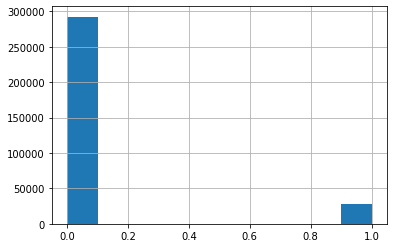

In [ ]:
df_encoded['HeartDisease'].hist()

## Step 5: Data Split [2 points]

Use  `train_test_split` from Scikit-learn and split the Features and Label(Y) to 70% training subset and 30% test subset. Use the variable names as shown below

In [ ]:
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION


X = df_encoded.drop('HeartDisease',axis=1).values
Y = df_encoded['HeartDisease'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
 


### END SOLUTION

## Step 6: Logistic Regression [2 points]

 

1.   Use  `LogisticRegression` from `sklearn.linear_model` and train a classification model named `model1`
2.   Predict the label for test data and store the predictions in a variable named `Y_test_Predicted`



If you run the model with default parameters, you will get convergence warning. Increase the `max_iter` parameter till the warning disappears! You should not get any warning.

In [ ]:
from sklearn.linear_model import LogisticRegression
### BEGIN SOLUTION

model1 = LogisticRegression( max_iter=10000)
model1.fit(X_train,Y_train)

Y_test_Predicted=model1.predict(X_test)


### END SOLUTION

## Step 7: Confusion Matrix

Run the following code block and confusion matrix should show up!

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9154775430221287
f1_score:  0.15275310834813502
Precision:  0.5044858523119393
Recall:  0.09000246244767299


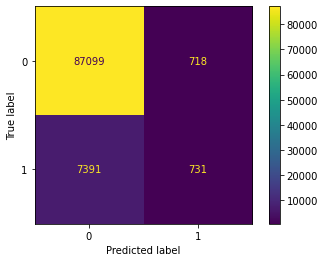

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plot_confusion_matrix(model1,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted))
print('Precision: ', precision_score(Y_test,Y_test_Predicted))
print('Recall: ', recall_score(Y_test,Y_test_Predicted))

## Step 8: Something is Wrong!

1.  Review the accuracy number and it should be high in contrast to f1-score. Why? 

2.  See the confusion matrix, you have way more data for people that are not sick and model predicted them well. But out of all the second row of your matrix (Sick people), very few were predicted well.

3.  Basically, dataset is super unbalanced so if a model always says not sick not sick, you will have high overal accuracy. 

4.  That's why we rely on f1-score and not accuracy when data is unbalanced because we want a model which can predict sick people as well as healthy people!


## Step 9: Fix the issue [2 points]

When you run the following code, you will see that there is a parameter called `class_weight` which is `None`. 

In [ ]:
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

1.   Use  `LogisticRegression` from `sklearn.linear_model` and train a classification model named `model2` setting `class_weight='balanced'`. By setting this parameter, we are sampling from both classes (sick and not sick) consistantly and overcome the unbalanceness up to a certain point.
2.   Predict the label for test data and store the predictions in a variable named `Y_test_Predicted2`



If you run the model with default parameters, you will get convergence warning. Increase the `max_iter` parameter till the warning disappears! You should not get any warning.

In [ ]:
from sklearn.linear_model import LogisticRegression
### BEGIN SOLUTION

model2 = LogisticRegression(class_weight='balanced', max_iter=10000)
model2.fit(X_train,Y_train)
Y_test_Predicted2=model2.predict(X_test)


### END SOLUTION

## Step 10: Confusion Matrix revised

Run the following code block and confusion matrix should show up! You should see:

*   100% increase in f1-score and decrease in accuracy
*   On every row, the largest value is in the diagonal cell

In anotherword, model is learning instead of just saying not sick not sick!

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.7426385515796495
f1_score:  0.33495838608021117
Precision:  0.21437683158076193
Recall:  0.7655749815316425


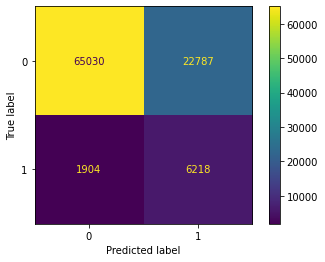

In [ ]:
plot_confusion_matrix(model2,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted2))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted2))
print('Precision: ', precision_score(Y_test,Y_test_Predicted2))
print('Recall: ', recall_score(Y_test,Y_test_Predicted2))
